# Dataset - Irving
## Análisis de Columnas Vertebrales con Python

¡Bienvenido a este tutorial de Machine Learning! En este notebook aprenderemos los conceptos fundamentales del machine learning aplicándolos a un dataset real sobre columnas vertebrales.

### ¿Qué aprenderemos?
1. **Análisis Exploratorio de Datos (EDA)**
2. **Preprocesamiento de datos**
3. **Entrenamiento de modelos de clasificación**
4. **Evaluación de modelos**
5. **Visualización de resultados**

### Dataset: Columnas Vertebrales
Este dataset contiene mediciones de columnas vertebrales de pacientes y su clasificación como "Normal" o "Abnormal". Es perfecto para aprender clasificación binaria.


## 1. Importación de Librerías

Primero, importamos todas las librerías necesarias para nuestro análisis:


In [18]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Librerías de machine learning
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

print("Todas las librerías importadas correctamente!")
print("Versiones de las librerías principales:")
print(f"   - Pandas: {pd.__version__}")
print(f"   - NumPy: {np.__version__}")
print(f"   - Scikit-learn: {sklearn.__version__}")


Todas las librerías importadas correctamente!
Versiones de las librerías principales:
   - Pandas: 2.2.2
   - NumPy: 1.26.4
   - Scikit-learn: 1.5.1


## 2. Carga y Exploración Inicial de Datos

Ahora cargamos nuestro dataset y realizamos una exploración inicial:


In [19]:
# Cargar el dataset
df = pd.read_csv('/Users/irvingmorales/Desktop/column_2C_weka.csv')

print("Información básica del dataset:")
print(f"   - Forma del dataset: {df.shape}")
print(f"   - Número de filas: {df.shape[0]}")
print(f"   - Número de columnas: {df.shape[1]}")
print()

print("Primeras 5 filas del dataset:")
df.head()


Información básica del dataset:
   - Forma del dataset: (310, 7)
   - Número de filas: 310
   - Número de columnas: 7

Primeras 5 filas del dataset:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [20]:
# Información detallada del dataset
print("Información detallada del dataset:")
print(df.info())
print()

print("Estadísticas descriptivas:")
df.describe()


Información detallada del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None

Estadísticas descriptivas:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [21]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values)
print()

# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")
print()

# Distribución de la variable objetivo
print("Distribución de la variable objetivo (class):")
class_distribution = df['class'].value_counts()
print(class_distribution)
print()
print("Porcentajes:")
print((class_distribution / len(df) * 100).round(2))


Valores faltantes por columna:
pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Número de filas duplicadas: 0

Distribución de la variable objetivo (class):
class
Abnormal    210
Normal      100
Name: count, dtype: int64

Porcentajes:
class
Abnormal    67.74
Normal      32.26
Name: count, dtype: float64


## 3. Análisis Exploratorio de Datos (EDA)

Ahora vamos a explorar visualmente nuestros datos para entender mejor las relaciones entre las variables:


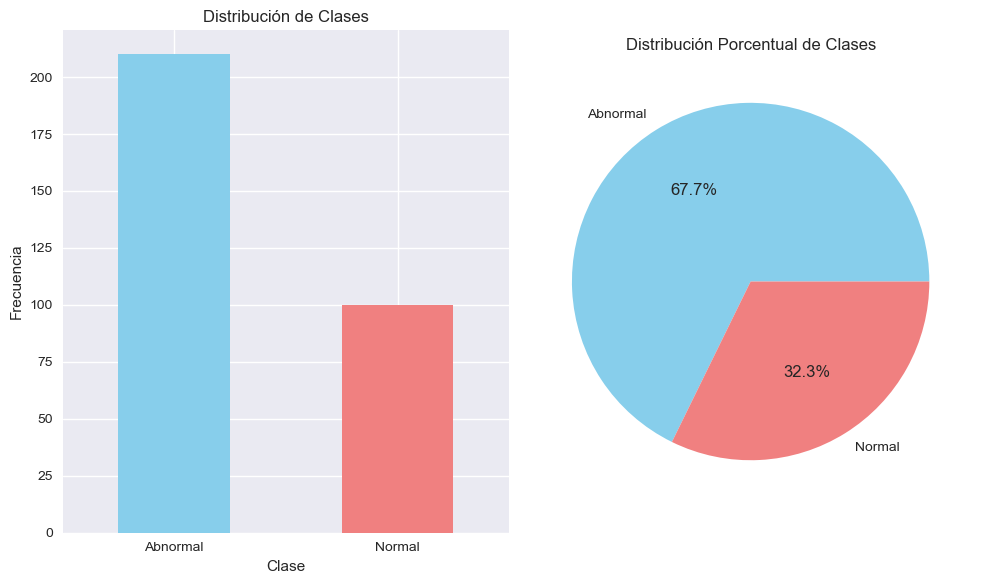

Interpretación:
   - El dataset está relativamente balanceado
   - Tenemos más casos 'Abnormal' que 'Normal'
   - Esto es típico en datasets médicos donde se busca detectar anomalías


In [22]:
# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'])
plt.title('Distribución Porcentual de Clases')

plt.tight_layout()
plt.show()

print("Interpretación:")
print("   - El dataset está relativamente balanceado")
print("   - Tenemos más casos 'Abnormal' que 'Normal'")
print("   - Esto es típico en datasets médicos donde se busca detectar anomalías")


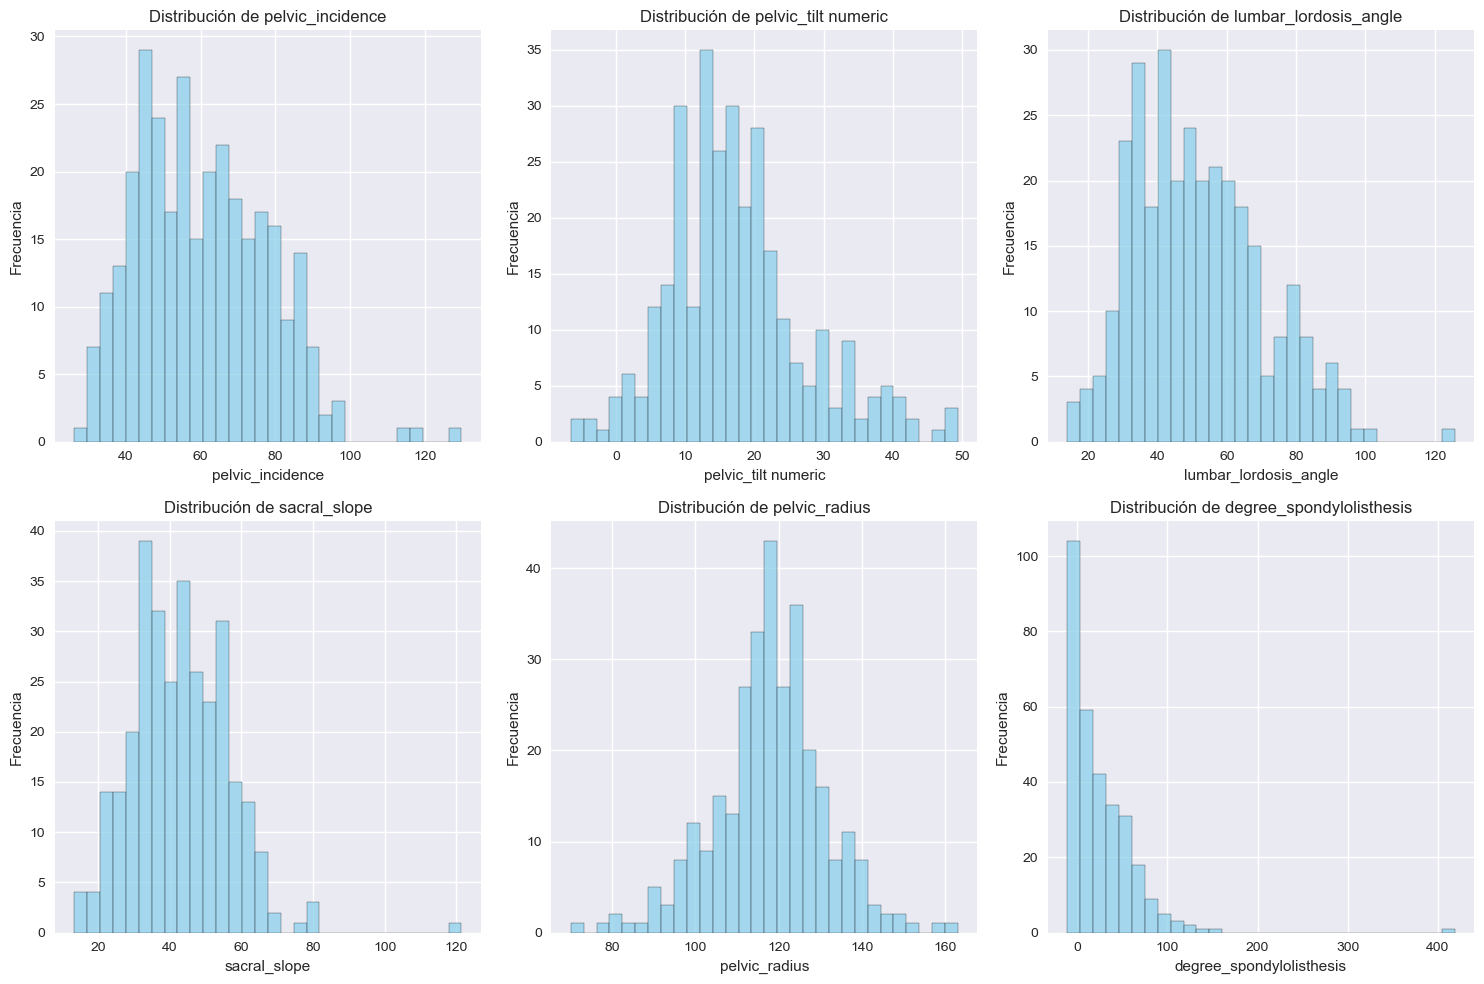

Observaciones sobre las distribuciones:
   - Las variables tienen diferentes escalas
   - Algunas parecen tener distribuciones normales
   - Otras tienen distribuciones más sesgadas
   - Esto sugiere que necesitaremos normalizar los datos


In [23]:
# Histogramas de todas las características numéricas
features = df.columns[:-1]  # Todas las columnas excepto 'class'

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("Observaciones sobre las distribuciones:")
print("   - Las variables tienen diferentes escalas")
print("   - Algunas parecen tener distribuciones normales")
print("   - Otras tienen distribuciones más sesgadas")
print("   - Esto sugiere que necesitaremos normalizar los datos")


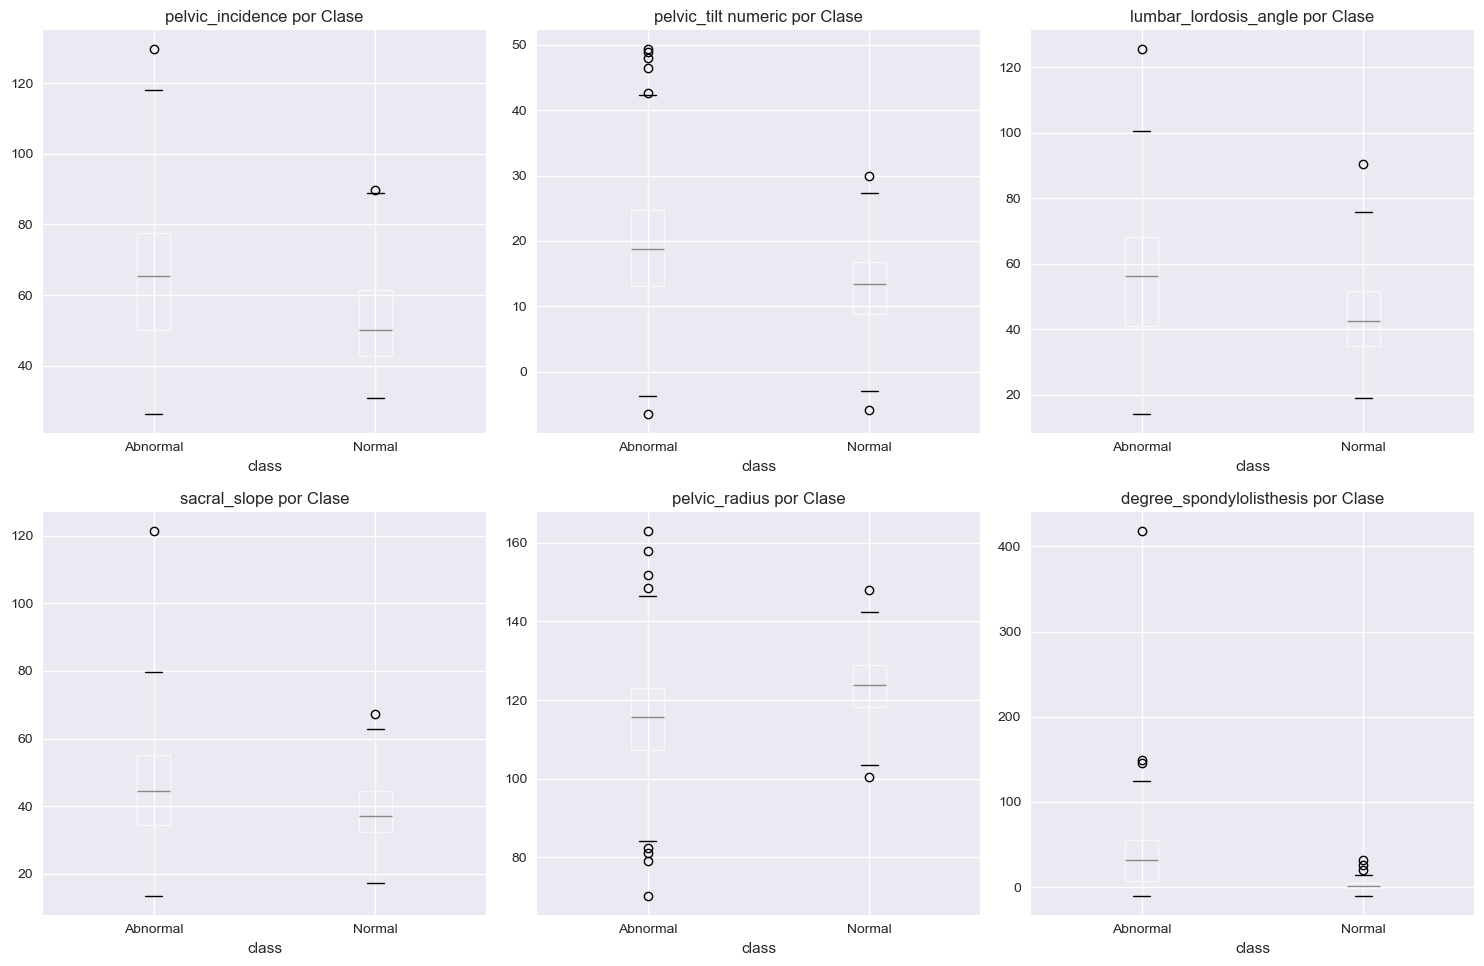

Interpretación de los boxplots:
   - Los boxplots muestran diferencias entre clases
   - Algunas variables tienen medias muy diferentes entre Normal y Abnormal
   - Esto sugiere que estas variables serán importantes para la clasificación


In [24]:
# Boxplots para comparar distribuciones por clase
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=feature, by='class', ax=plt.gca())
    plt.title(f'{feature} por Clase')
    plt.suptitle('')  # Eliminar título automático

plt.tight_layout()
plt.show()

print("Interpretación de los boxplots:")
print("   - Los boxplots muestran diferencias entre clases")
print("   - Algunas variables tienen medias muy diferentes entre Normal y Abnormal")
print("   - Esto sugiere que estas variables serán importantes para la clasificación")


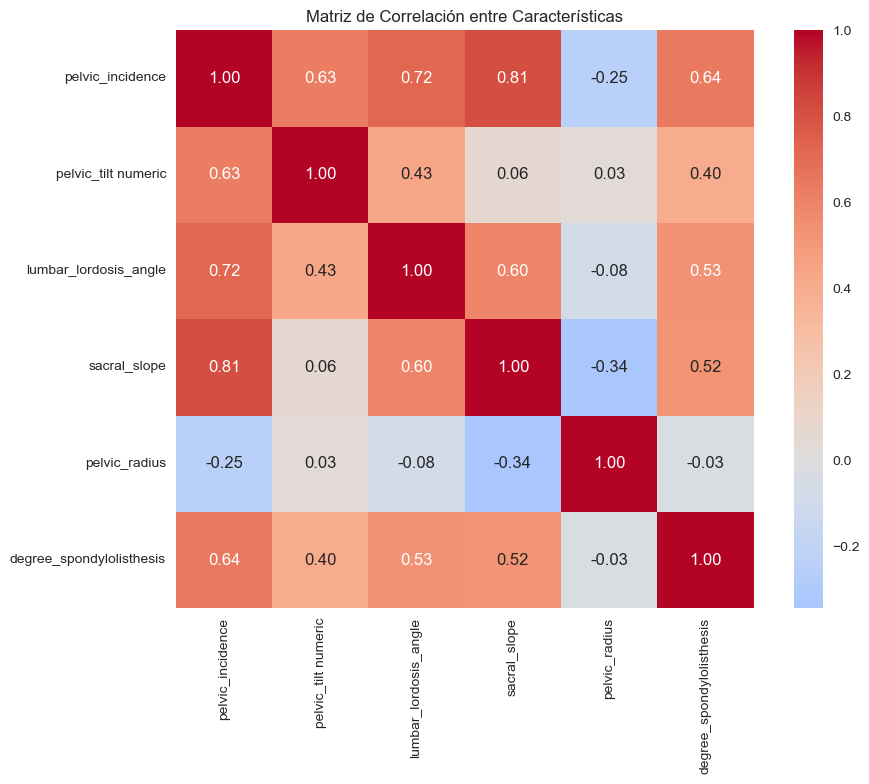

Interpretación de la matriz de correlación:
   - Valores cercanos a 1: correlación positiva fuerte
   - Valores cercanos a -1: correlación negativa fuerte
   - Valores cercanos a 0: poca o ninguna correlación
   - Las correlaciones altas pueden indicar redundancia en las características


In [25]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Matriz de Correlación entre Características')
plt.tight_layout()
plt.show()

print("Interpretación de la matriz de correlación:")
print("   - Valores cercanos a 1: correlación positiva fuerte")
print("   - Valores cercanos a -1: correlación negativa fuerte")
print("   - Valores cercanos a 0: poca o ninguna correlación")
print("   - Las correlaciones altas pueden indicar redundancia en las características")


## 4. Preprocesamiento de Datos

Antes de entrenar nuestros modelos, necesitamos preparar los datos:


In [26]:
# Separar características (X) y variable objetivo (y)
X = df.drop('class', axis=1)  # Todas las columnas excepto 'class'
y = df['class']  # Solo la columna 'class'

print("Forma de los datos:")
print(f"   - X (características): {X.shape}")
print(f"   - y (variable objetivo): {y.shape}")
print()

# Codificar la variable objetivo (Normal=0, Abnormal=1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Codificación de la variable objetivo:")
print(f"   - Clases originales: {le.classes_}")
print(f"   - Normal = {le.transform(['Normal'])[0]}")
print(f"   - Abnormal = {le.transform(['Abnormal'])[0]}")
print()

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("División de datos:")
print(f"   - Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"   - Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"   - Proporción de prueba: {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]):.1%}")


Forma de los datos:
   - X (características): (310, 6)
   - y (variable objetivo): (310,)

Codificación de la variable objetivo:
   - Clases originales: ['Abnormal' 'Normal']
   - Normal = 1
   - Abnormal = 0

División de datos:
   - Conjunto de entrenamiento: 248 muestras
   - Conjunto de prueba: 62 muestras
   - Proporción de prueba: 20.0%


In [27]:
# Normalización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalización de características:")
print("   - Aplicamos StandardScaler para normalizar las características")
print("   - Esto es importante porque las variables tienen diferentes escalas")
print()

# Convertir de vuelta a DataFrame para mejor visualización
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Comparación antes y después de la normalización:")
print("   - Antes (primeras 3 filas):")
print(X_train.head(3))
print()
print("   - Después (primeras 3 filas):")
print(X_train_scaled_df.head(3))
print()

print("Estadísticas después de la normalización:")
print(X_train_scaled_df.describe())


Normalización de características:
   - Aplicamos StandardScaler para normalizar las características
   - Esto es importante porque las variables tienen diferentes escalas

Comparación antes y después de la normalización:
   - Antes (primeras 3 filas):
     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
81          74.005541            21.122402              57.379502   
203         73.635962             9.711318              63.000000   
224         89.834676            22.639217              90.563461   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
81      52.883139     120.205963                 74.555166  
203     63.924644      98.727930                 26.975787  
224     67.195460     100.501192                  3.040973  

   - Después (primeras 3 filas):
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0          0.751299             0.358793               0.265541      0.704144   
1          0.730159            

## 5. Entrenamiento de Modelos de Machine Learning

Ahora vamos a entrenar varios modelos diferentes y comparar su rendimiento:


In [28]:
# Definir los modelos que vamos a probar
models = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Diccionario para almacenar los resultados
results = {}

print("Entrenando modelos...")
print("=" * 50)

for name, model in models.items():
    print(f"\nEntrenando {name}...")
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Almacenar resultados
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"   Precisión: {accuracy:.3f}")
    print(f"   CV Score (media ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

print("\nResumen de resultados:")
print("=" * 50)
for name, result in results.items():
    print(f"{name:20} | Precisión: {result['accuracy']:.3f} | CV: {result['cv_mean']:.3f} ± {result['cv_std']:.3f}")


Entrenando modelos...

Entrenando Regresión Logística...
   Precisión: 0.823
   CV Score (media ± std): 0.859 ± 0.033

Entrenando Random Forest...
   Precisión: 0.806
   CV Score (media ± std): 0.827 ± 0.047

Entrenando SVM...
   Precisión: 0.855
   CV Score (media ± std): 0.835 ± 0.049

Resumen de resultados:
Regresión Logística  | Precisión: 0.823 | CV: 0.859 ± 0.033
Random Forest        | Precisión: 0.806 | CV: 0.827 ± 0.047
SVM                  | Precisión: 0.855 | CV: 0.835 ± 0.049


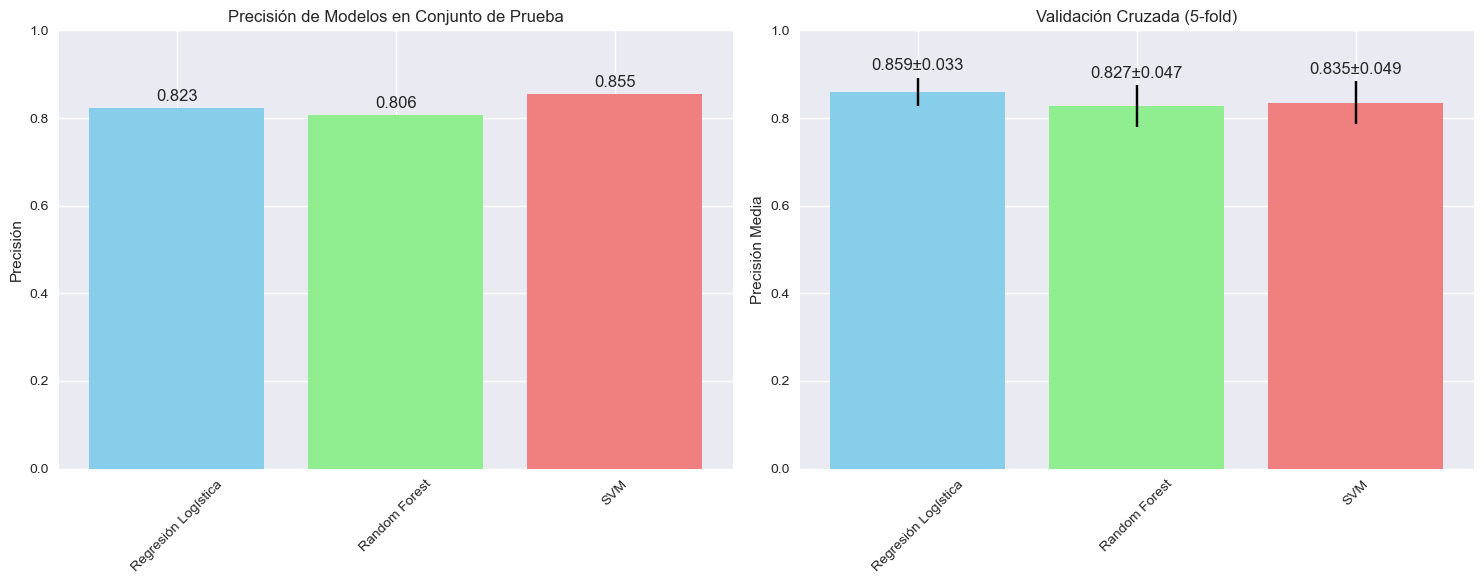


Mejor modelo: Regresión Logística
   - Precisión en prueba: 0.823
   - CV Score: 0.859 ± 0.033


In [29]:
# Visualizar comparación de modelos
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para precisión
bars1 = ax1.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Precisión de Modelos en Conjunto de Prueba')
ax1.set_ylabel('Precisión')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for bar, acc in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Gráfico de barras para validación cruzada
bars2 = ax2.bar(model_names, cv_means, yerr=cv_stds, capsize=5, 
                color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Validación Cruzada (5-fold)')
ax2.set_ylabel('Precisión Media')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for bar, mean, std in zip(bars2, cv_means, cv_stds):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01, 
             f'{mean:.3f}±{std:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Encontrar el mejor modelo
best_model_name = max(results.keys(), key=lambda x: results[x]['cv_mean'])
print(f"\nMejor modelo: {best_model_name}")
print(f"   - Precisión en prueba: {results[best_model_name]['accuracy']:.3f}")
print(f"   - CV Score: {results[best_model_name]['cv_mean']:.3f} ± {results[best_model_name]['cv_std']:.3f}")


## 6. Evaluación Detallada del Mejor Modelo

Vamos a hacer una evaluación más detallada del mejor modelo:


In [30]:
# Evaluación detallada del mejor modelo
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

print(f"Evaluación detallada de {best_model_name}:")
print("=" * 50)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best, 
                          target_names=['Normal', 'Abnormal']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
print(f"\nMatriz de Confusión:")
print(f"   Predicción:  Normal  Abnormal")
print(f"   Real Normal:    {cm[0,0]:3d}      {cm[0,1]:3d}")
print(f"   Real Abnormal: {cm[1,0]:3d}      {cm[1,1]:3d}")

# Calcular métricas adicionales
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nMétricas adicionales:")
print(f"   - Precisión: {precision:.3f}")
print(f"   - Sensibilidad (Recall): {recall:.3f}")
print(f"   - Especificidad: {specificity:.3f}")
print(f"   - F1-Score: {f1_score:.3f}")


Evaluación detallada de Regresión Logística:
Reporte de Clasificación:
              precision    recall  f1-score   support

      Normal       0.86      0.88      0.87        42
    Abnormal       0.74      0.70      0.72        20

    accuracy                           0.82        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.82      0.82      0.82        62


Matriz de Confusión:
   Predicción:  Normal  Abnormal
   Real Normal:     37        5
   Real Abnormal:   6       14

Métricas adicionales:
   - Precisión: 0.737
   - Sensibilidad (Recall): 0.700
   - Especificidad: 0.881
   - F1-Score: 0.718


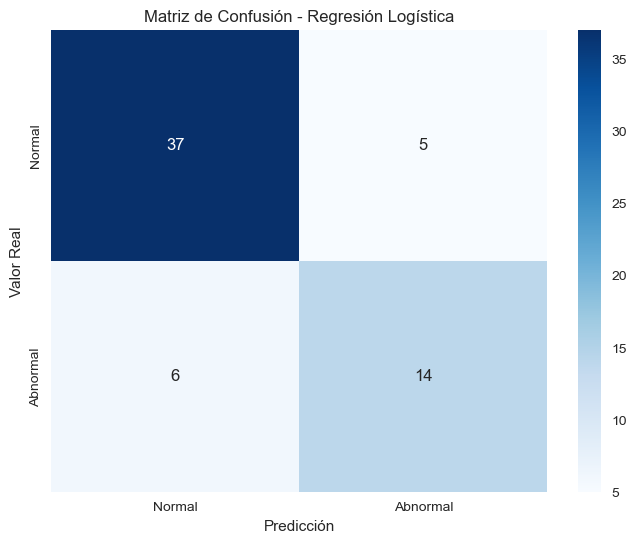

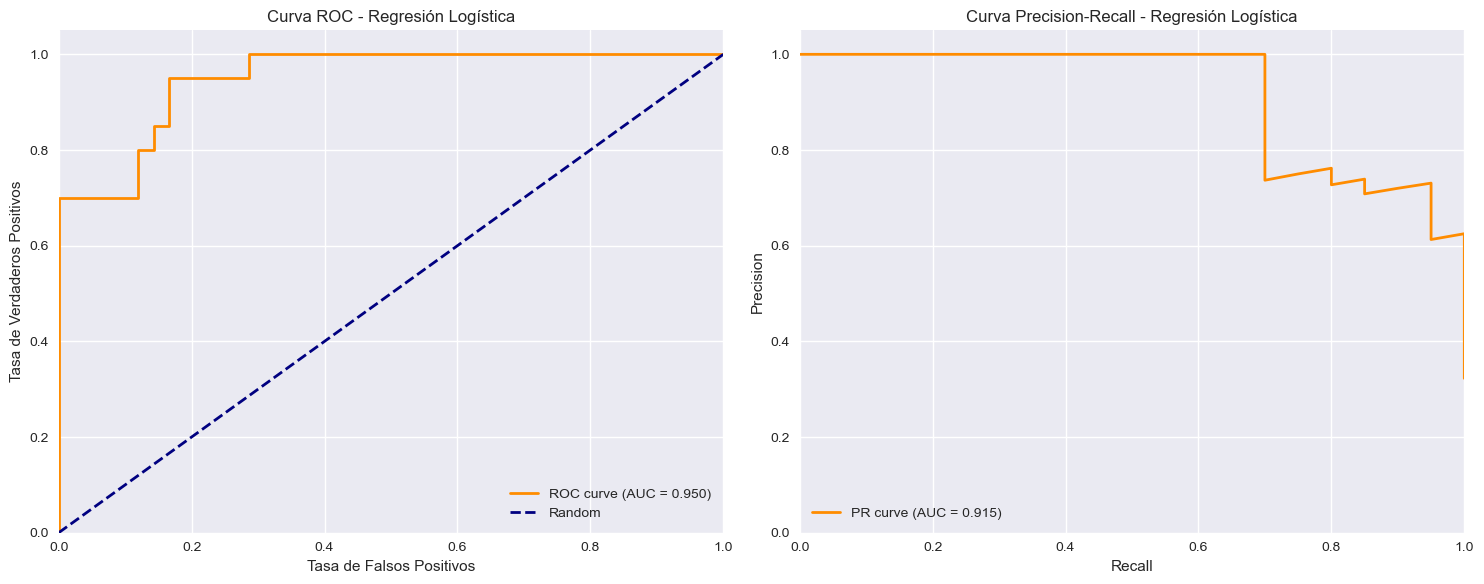


Áreas bajo las curvas:
   - AUC-ROC: 0.950
   - AUC-PR: 0.915


In [31]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Abnormal'],
            yticklabels=['Normal', 'Abnormal'])
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Curva ROC si el modelo tiene probabilidades
if results[best_model_name]['y_pred_proba'] is not None:
    y_pred_proba = results[best_model_name]['y_pred_proba']
    
    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Calcular curva Precision-Recall
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Visualizar curvas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Curva ROC
    ax1.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('Tasa de Falsos Positivos')
    ax1.set_ylabel('Tasa de Verdaderos Positivos')
    ax1.set_title(f'Curva ROC - {best_model_name}')
    ax1.legend(loc="lower right")
    ax1.grid(True)
    
    # Curva Precision-Recall
    ax2.plot(recall_curve, precision_curve, color='darkorange', lw=2,
             label=f'PR curve (AUC = {pr_auc:.3f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title(f'Curva Precision-Recall - {best_model_name}')
    ax2.legend(loc="lower left")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nÁreas bajo las curvas:")
    print(f"   - AUC-ROC: {roc_auc:.3f}")
    print(f"   - AUC-PR: {pr_auc:.3f}")
else:
    print("\nEste modelo no proporciona probabilidades para las curvas ROC y PR")


## 7. Análisis de Importancia de Características

Vamos a analizar qué características son más importantes para el modelo:


Importancia de características (Regresión Logística - Coeficientes):
                    feature  importance
5  degree_spondylolisthesis    3.812315
4             pelvic_radius    1.099237
1       pelvic_tilt numeric    0.595857
3              sacral_slope    0.571092
2     lumbar_lordosis_angle    0.235117
0          pelvic_incidence    0.108708


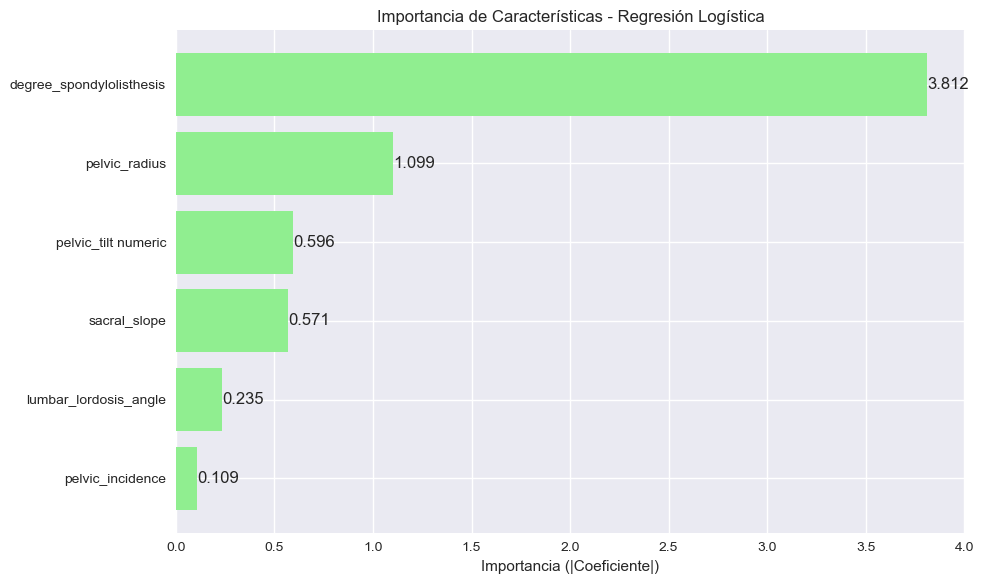

In [32]:
# Análisis de importancia de características
if hasattr(best_model, 'feature_importances_'):
    # Para Random Forest
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    
    # Crear DataFrame con importancia
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("Importancia de características (Random Forest):")
    print(importance_df)
    
    # Visualizar importancia
    plt.figure(figsize=(10, 6))
    bars = plt.barh(importance_df['feature'], importance_df['importance'], 
                    color='skyblue')
    plt.xlabel('Importancia')
    plt.title(f'Importancia de Características - {best_model_name}')
    plt.gca().invert_yaxis()
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # Para Regresión Logística
    feature_importance = np.abs(best_model.coef_[0])
    feature_names = X.columns
    
    # Crear DataFrame con importancia
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("Importancia de características (Regresión Logística - Coeficientes):")
    print(importance_df)
    
    # Visualizar importancia
    plt.figure(figsize=(10, 6))
    bars = plt.barh(importance_df['feature'], importance_df['importance'], 
                    color='lightgreen')
    plt.xlabel('Importancia (|Coeficiente|)')
    plt.title(f'Importancia de Características - {best_model_name}')
    plt.gca().invert_yaxis()
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Este modelo no proporciona información de importancia de características")


## 8. Conclusiones y Resumen

Vamos a resumir todo lo que hemos aprendido en este tutorial:


In [33]:
print("RESUMEN DEL TUTORIAL DE MACHINE LEARNING")
print("=" * 60)

print("\nDATASET ANALIZADO:")
print(f"   - Nombre: Columnas Vertebrales (column_2C_weka.csv)")
print(f"   - Tamaño: {df.shape[0]} muestras, {df.shape[1]} características")
print(f"   - Problema: Clasificación binaria (Normal vs Abnormal)")
print(f"   - Distribución: {class_distribution['Normal']} Normal, {class_distribution['Abnormal']} Abnormal")

print("\nANÁLISIS EXPLORATORIO:")
print("   - No hay valores faltantes")
print("   - No hay duplicados")
print("   - Dataset relativamente balanceado")
print("   - Características con diferentes escalas (requiere normalización)")

print("\nMODELOS PROBADOS:")
for name, result in results.items():
    print(f"   - {name}: {result['accuracy']:.3f} precisión, {result['cv_mean']:.3f} CV")

print(f"\nMEJOR MODELO: {best_model_name}")
print(f"   - Precisión: {results[best_model_name]['accuracy']:.3f}")
print(f"   - Validación Cruzada: {results[best_model_name]['cv_mean']:.3f} ± {results[best_model_name]['cv_std']:.3f}")

print("\nMÉTRICAS DEL MEJOR MODELO:")
print(f"   - Precisión: {precision:.3f}")
print(f"   - Sensibilidad: {recall:.3f}")
print(f"   - Especificidad: {specificity:.3f}")
print(f"   - F1-Score: {f1_score:.3f}")

print("\nCONCEPTOS APRENDIDOS:")
print("   1. Análisis Exploratorio de Datos (EDA)")
print("   2. Preprocesamiento (normalización, codificación)")
print("   3. División de datos (train/test split)")
print("   4. Entrenamiento de múltiples modelos")
print("   5. Validación cruzada")
print("   6. Evaluación de modelos (métricas)")
print("   7. Visualización de resultados")
print("   8. Análisis de importancia de características")

print("\nPRÓXIMOS PASOS SUGERIDOS:")
print("   - Probar más modelos (XGBoost, Neural Networks)")
print("   - Optimización de hiperparámetros")
print("   - Feature engineering")
print("   - Análisis de datos desbalanceados")
print("   - Deploy del modelo en producción")

print("\n¡FELICITACIONES!")
print("   Has completado tu primer proyecto de Machine Learning completo.")
print("   Continúa practicando con otros datasets para mejorar tus habilidades.")


RESUMEN DEL TUTORIAL DE MACHINE LEARNING

DATASET ANALIZADO:
   - Nombre: Columnas Vertebrales (column_2C_weka.csv)
   - Tamaño: 310 muestras, 7 características
   - Problema: Clasificación binaria (Normal vs Abnormal)
   - Distribución: 100 Normal, 210 Abnormal

ANÁLISIS EXPLORATORIO:
   - No hay valores faltantes
   - No hay duplicados
   - Dataset relativamente balanceado
   - Características con diferentes escalas (requiere normalización)

MODELOS PROBADOS:
   - Regresión Logística: 0.823 precisión, 0.859 CV
   - Random Forest: 0.806 precisión, 0.827 CV
   - SVM: 0.855 precisión, 0.835 CV

MEJOR MODELO: Regresión Logística
   - Precisión: 0.823
   - Validación Cruzada: 0.859 ± 0.033

MÉTRICAS DEL MEJOR MODELO:
   - Precisión: 0.737
   - Sensibilidad: 0.700
   - Especificidad: 0.881
   - F1-Score: 0.718

CONCEPTOS APRENDIDOS:
   1. Análisis Exploratorio de Datos (EDA)
   2. Preprocesamiento (normalización, codificación)
   3. División de datos (train/test split)
   4. Entrenamiento 

## 9. Código para Predicciones Futuras

Aquí tienes un ejemplo de cómo usar el modelo entrenado para hacer predicciones en nuevos datos:


In [34]:
# Función para hacer predicciones en nuevos datos
def predict_new_sample(model, scaler, label_encoder, sample_data):
    """
    Función para predecir la clase de una nueva muestra
    
    Parámetros:
    - model: modelo entrenado
    - scaler: scaler usado para normalizar
    - label_encoder: encoder usado para las etiquetas
    - sample_data: diccionario con los valores de las características
    
    Retorna:
    - predicción: clase predicha
    - probabilidad: probabilidad de la predicción
    """
    
    # Convertir a DataFrame
    sample_df = pd.DataFrame([sample_data])
    
    # Normalizar
    sample_scaled = scaler.transform(sample_df)
    
    # Predecir
    prediction = model.predict(sample_scaled)[0]
    prediction_class = label_encoder.inverse_transform([prediction])[0]
    
    # Obtener probabilidades si está disponible
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(sample_scaled)[0]
        prob_normal = probabilities[0]
        prob_abnormal = probabilities[1]
    else:
        prob_normal = None
        prob_abnormal = None
    
    return prediction_class, prob_normal, prob_abnormal

# Ejemplo de uso con datos de prueba
print("EJEMPLO DE PREDICCIÓN:")
print("=" * 40)

# Tomar una muestra del conjunto de prueba
sample_idx = 0
sample_data = X_test.iloc[sample_idx].to_dict()

print("Datos de la muestra:")
for feature, value in sample_data.items():
    print(f"   {feature}: {value:.3f}")

print(f"\nClase real: {le.inverse_transform([y_test[sample_idx]])[0]}")

# Hacer predicción
pred_class, prob_normal, prob_abnormal = predict_new_sample(
    best_model, scaler, le, sample_data
)

print(f"Predicción: {pred_class}")
if prob_normal is not None:
    print(f"Probabilidades:")
    print(f"   - Normal: {prob_normal:.3f}")
    print(f"   - Abnormal: {prob_abnormal:.3f}")

# Verificar si la predicción es correcta
correct = (pred_class == le.inverse_transform([y_test[sample_idx]])[0])
print(f"Predicción {'correcta' if correct else 'incorrecta'}")

print("\nPara usar esta función con tus propios datos:")
print("   sample_data = {")
print("       'pelvic_incidence': 50.0,")
print("       'pelvic_tilt numeric': 15.0,")
print("       'lumbar_lordosis_angle': 30.0,")
print("       'sacral_slope': 35.0,")
print("       'pelvic_radius': 120.0,")
print("       'degree_spondylolisthesis': 5.0")
print("   }")
print("   prediction, prob_norm, prob_abnorm = predict_new_sample(best_model, scaler, le, sample_data)")


EJEMPLO DE PREDICCIÓN:
Datos de la muestra:
   pelvic_incidence: 63.960
   pelvic_tilt numeric: 16.061
   lumbar_lordosis_angle: 63.124
   sacral_slope: 47.899
   pelvic_radius: 142.360
   degree_spondylolisthesis: 6.299

Clase real: Normal
Predicción: Normal
Probabilidades:
   - Normal: 0.082
   - Abnormal: 0.918
Predicción correcta

Para usar esta función con tus propios datos:
   sample_data = {
       'pelvic_incidence': 50.0,
       'pelvic_tilt numeric': 15.0,
       'lumbar_lordosis_angle': 30.0,
       'sacral_slope': 35.0,
       'pelvic_radius': 120.0,
       'degree_spondylolisthesis': 5.0
   }
   prediction, prob_norm, prob_abnorm = predict_new_sample(best_model, scaler, le, sample_data)
